# Social Media Sentiment Analysis using Twitter Data

## Project Overview:
In this project, we analyze sentiment in social media data (specifically, Twitter data) to understand public sentiment toward specific topics, products, or events. Using Natural Language Processing (NLP) techniques, we preprocess text data, extract sentiment scores, and visualize sentiment trends over time.

## Steps Involved:
1. **Data Loading & Inspection**
2. **Data Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Sentiment Visualization**
5. **Hashtag Extraction and Analysis**
6. **Conclusion**

---

## 1. Data Loading & Inspection

First, we load the datasets and inspect their structure. The data consists of tweets along with sentiment labels (0 for negative and 1 for positive).


In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

import warnings

## 2. Data Preprocessing

Before we begin the analysis, we need to ensure the text data is clean and ready for processing. We'll clean up the text by removing special characters, URLs, and mentions, and perform basic text cleaning steps.

In [99]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

In [101]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [118]:
train.head()
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [120]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [122]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [124]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


# 3. Exploratory Data Analysis (EDA)

Now, we perform some exploratory data analysis (EDA) to understand the distribution of sentiments, the length of tweets, and the most frequent words. This helps us understand the nature of the dataset.

### Sentiment Distribution

First, let's check the distribution of sentiment labels (positive vs negative).


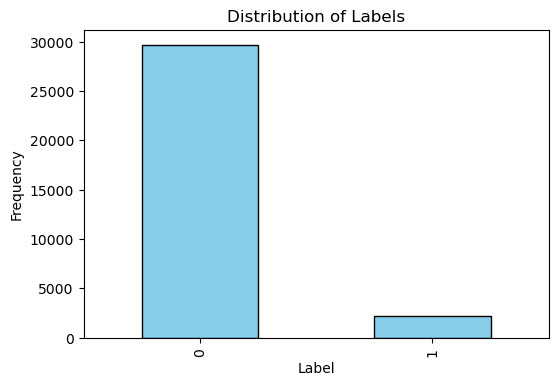

In [148]:
# Plotting the distribution of labels with black bars and white outlines
train['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', figsize=(6, 4))

# Adding title and labels
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Show the plot
plt.show()

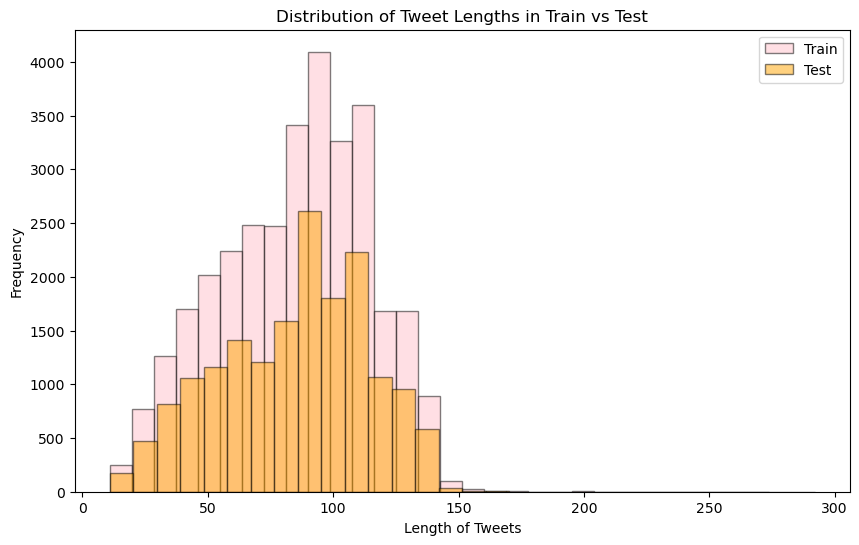

In [138]:
import matplotlib.pyplot as plt

# Plotting the distribution of tweet lengths for both train and test datasets
plt.figure(figsize=(10, 6))

# Plot the histogram for the train dataset with 'pink' color
train['tweet'].str.len().plot.hist(alpha=0.5, color='pink', bins=30, label='Train', edgecolor='black')

# Plot the histogram for the test dataset with 'orange' color
test['tweet'].str.len().plot.hist(alpha=0.5, color='orange', bins=30, label='Test', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Tweet Lengths in Train vs Test')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')

# Adding legend
plt.legend()

# Display the plot
plt.show()

## 4. Sentiment Visualization

We now use word clouds to visualize the most frequent words associated with positive and negative sentiments.


In [130]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [132]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

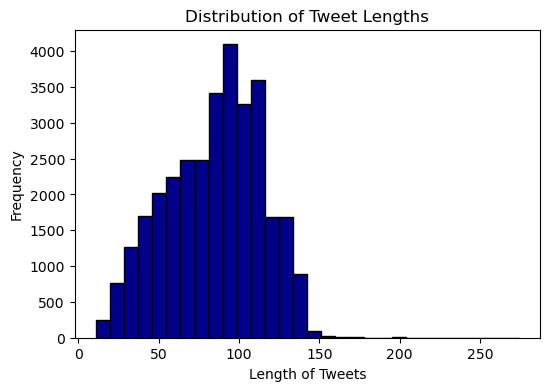

In [136]:
# Calculate the length of each tweet
train['len'] = train['tweet'].str.len()

# Plot a histogram for tweet lengths, using the 'len' column directly
train['len'].plot.hist(bins=30, color='darkblue', edgecolor='black', figsize=(6, 4))

# Adding title and labels
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')

# Show the plot
plt.show()

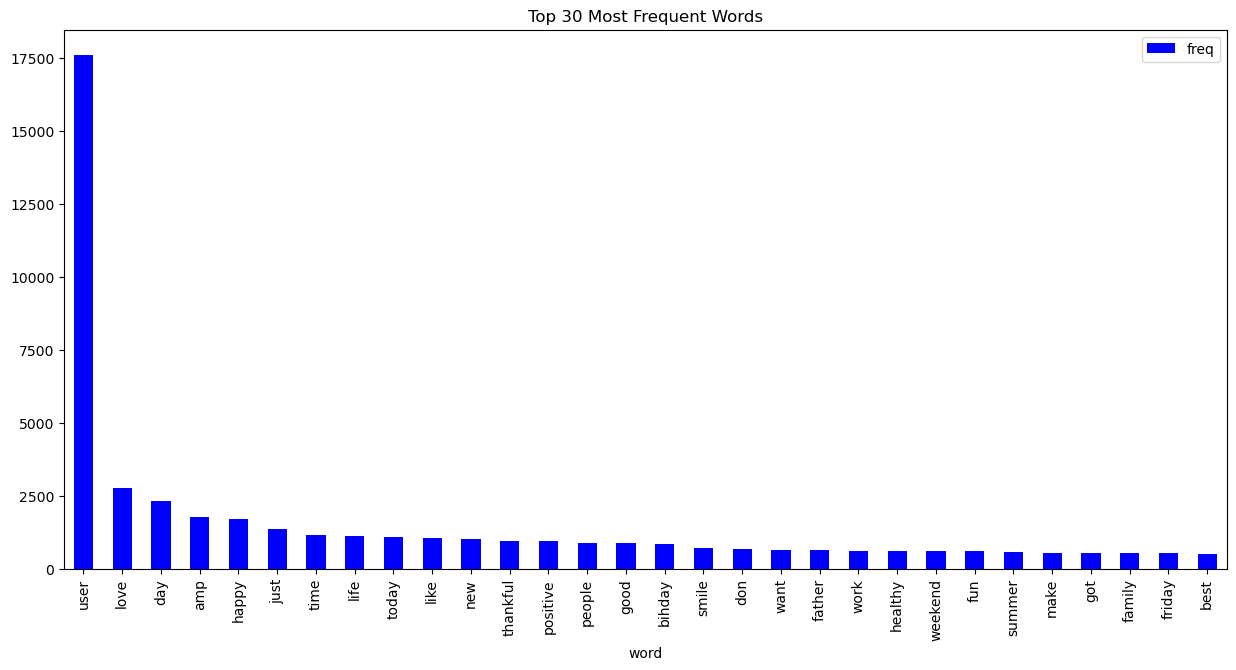

In [140]:
# Create the CountVectorizer and fit_transform directly
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train['tweet'])

# Get word frequencies and convert to DataFrame
frequency = pd.DataFrame(
    zip(cv.get_feature_names_out(), words.sum(axis=0).A1), columns=['word', 'freq']
)

# Plot top 30 most frequent words
frequency.nlargest(30, 'freq').plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
plt.title("Top 30 Most Frequent Words")
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

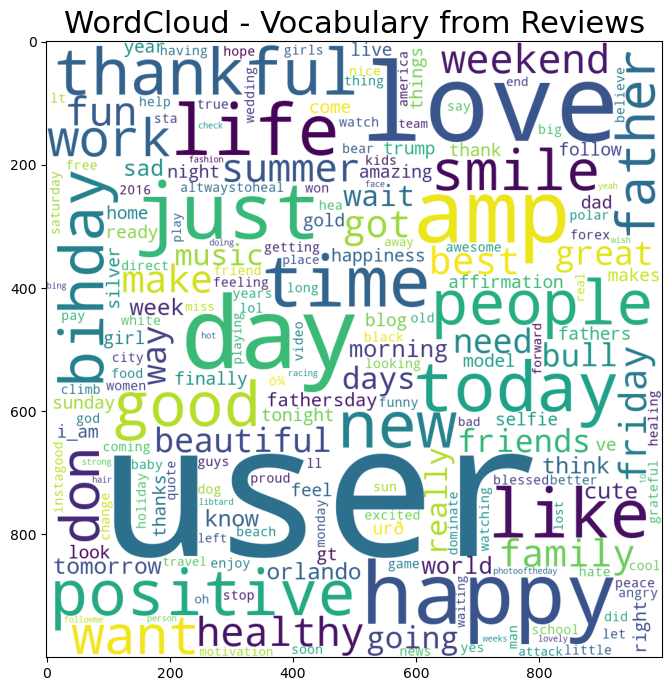

In [150]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

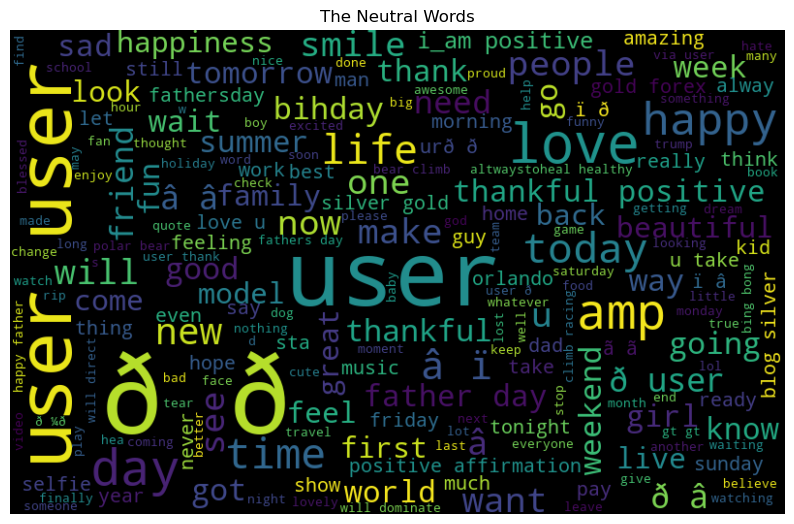

In [152]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

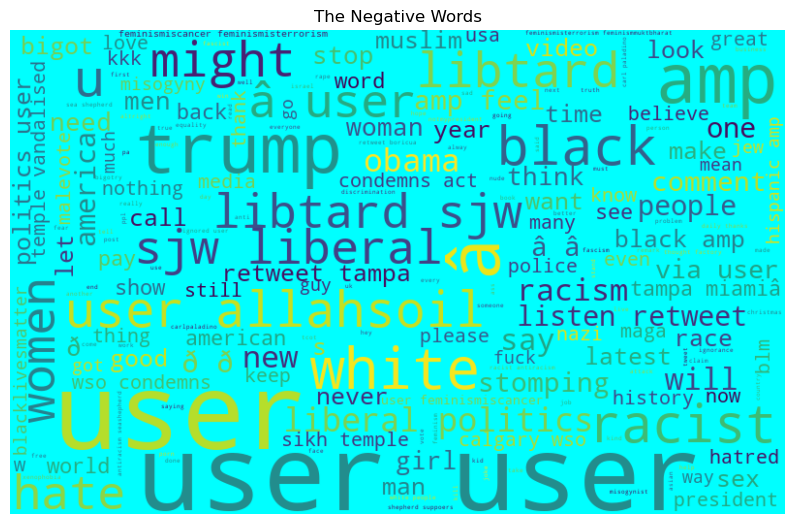

In [154]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

## 5. Hashtag Extraction and Analysis

Hashtags can provide valuable insights into the topics being discussed. We'll extract and visualize the most frequent hashtags in both positive and negative tweets.

In [156]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [158]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

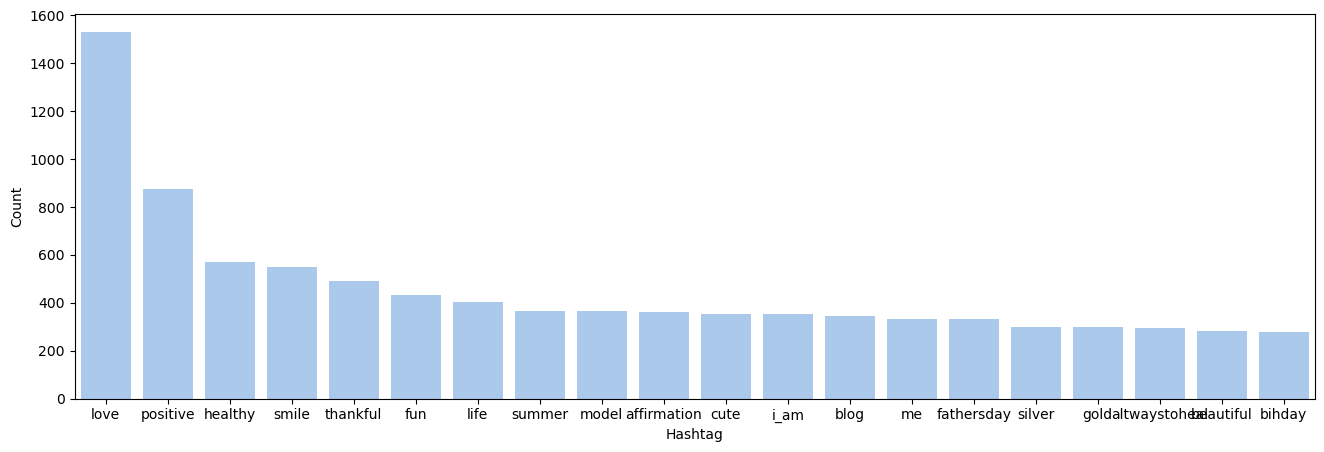

In [159]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

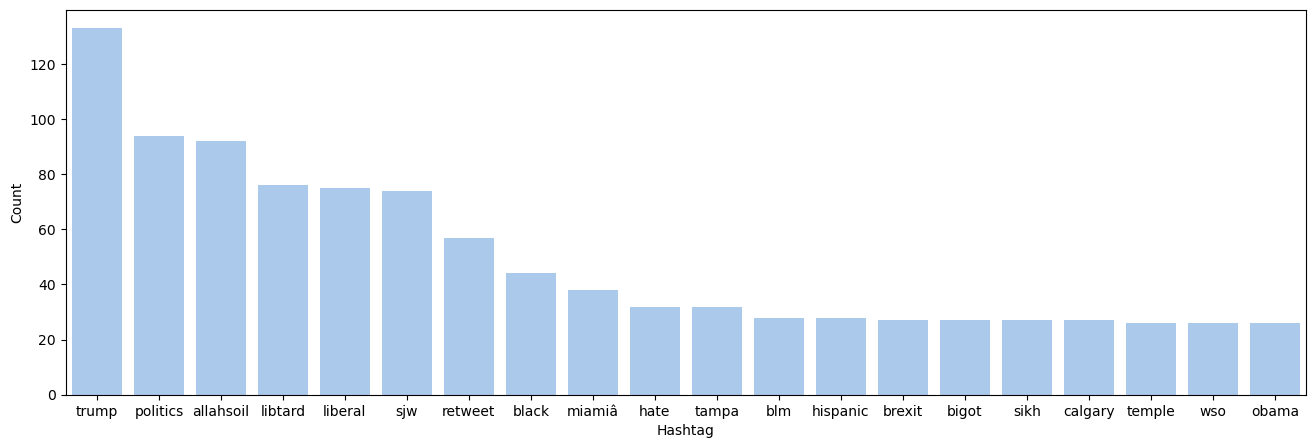

In [162]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## 6. Conclusion

### Key Insights:
- The distribution of sentiment labels shows a relatively balanced dataset, with both positive and negative tweets.
- The most frequent words reveal common expressions used in both positive and negative tweets, with certain words being strongly associated with each sentiment.
- Hashtags provide insight into the topics or events driving the sentiment, with certain hashtags being more prevalent in positive or negative sentiment categories.

### Future Steps:
- **Sentiment Classification Model**: Train a machine learning model to predict sentiment on the test dataset. We can use models like Logistic Regression or Naive Bayes.
- **Sentiment Trend Analysis**: If timestamps are available, analyze sentiment trends over time to see how public opinion changes.
